<a href="https://colab.research.google.com/github/realmistic/PythonInvest-basic-fin-analysis/blob/master/PythonInvest_com_2_Sentiment_Analysis_of_Financial_News_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Financial News NLP Analysis**
* **What?** Extracting the financial news through an API and getting the sentiment
* **Why?** Trace news coverage for your favourite stocks (or industry), check if high positive/negative sentiment is correlated with the stocks performance
* **How?**
  * *NewsAPI* in Python
  * *Vader* library for the sentiment generation
  * Example: Tesla stock in April-2021

Details in the article: https://pythoninvest.com/long-read/sentiment-analysis-of-financial-news

## 1) IMPORTS

In [ ]:
!pip install newsapi-python

In [ ]:
!pip install yfinance

In [ ]:
import nltk
### Uncomment it when the script runs for the first time 
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Show full output in Colab
# https://stackoverflow.com/questions/54692405/output-truncation-in-google-colab
pd.set_option('display.max_colwidth',1000)

#2) Obtain an Access Key for the NewsAPI 
* You can get a new FREE key on the website https://newsapi.org/
* NEWS_API_KEY = personal API Key

In [ ]:
# Init news api
NEWS_API_KEY = '2adc9646b17746ffbd42e9526c1443e1'

# '1900869fa01647fca0bdc19b4550daa0'

# 3) The News API example

In [ ]:
#https://newsapi.org/docs/endpoints/everything

newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [ ]:
articles

{'articles': [{'author': 'Lucas Matney',
   'content': 'Hello friends, and welcome back to Week in Review!\r\nLast week, I talked about Clubhouse’s slowing user growth. Well, this week news broke that they had been in talks with Twitter for a $4 billion acq… [+6748 chars]',
   'description': 'Hello friends, and welcome back to Week in Review! Last week, I talked about Clubhouse’s slowing user growth. Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable. Th…',
   'publishedAt': '2021-04-11T17:53:23Z',
   'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'title': 'A ‘more honest’ stock market',
   'url': 'http://techcrunch.com/2021/04/11/a-more-honest-stock-market/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/04/Untitled-5.jpg?w=640'},
  {'author': 'Matthew DeBord',
   'content': "Tesla is easily the strangest company I've ever covered in my entire career as a journal

# 4) Sentiment

In [ ]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


# 5) NEWS + Sentiment

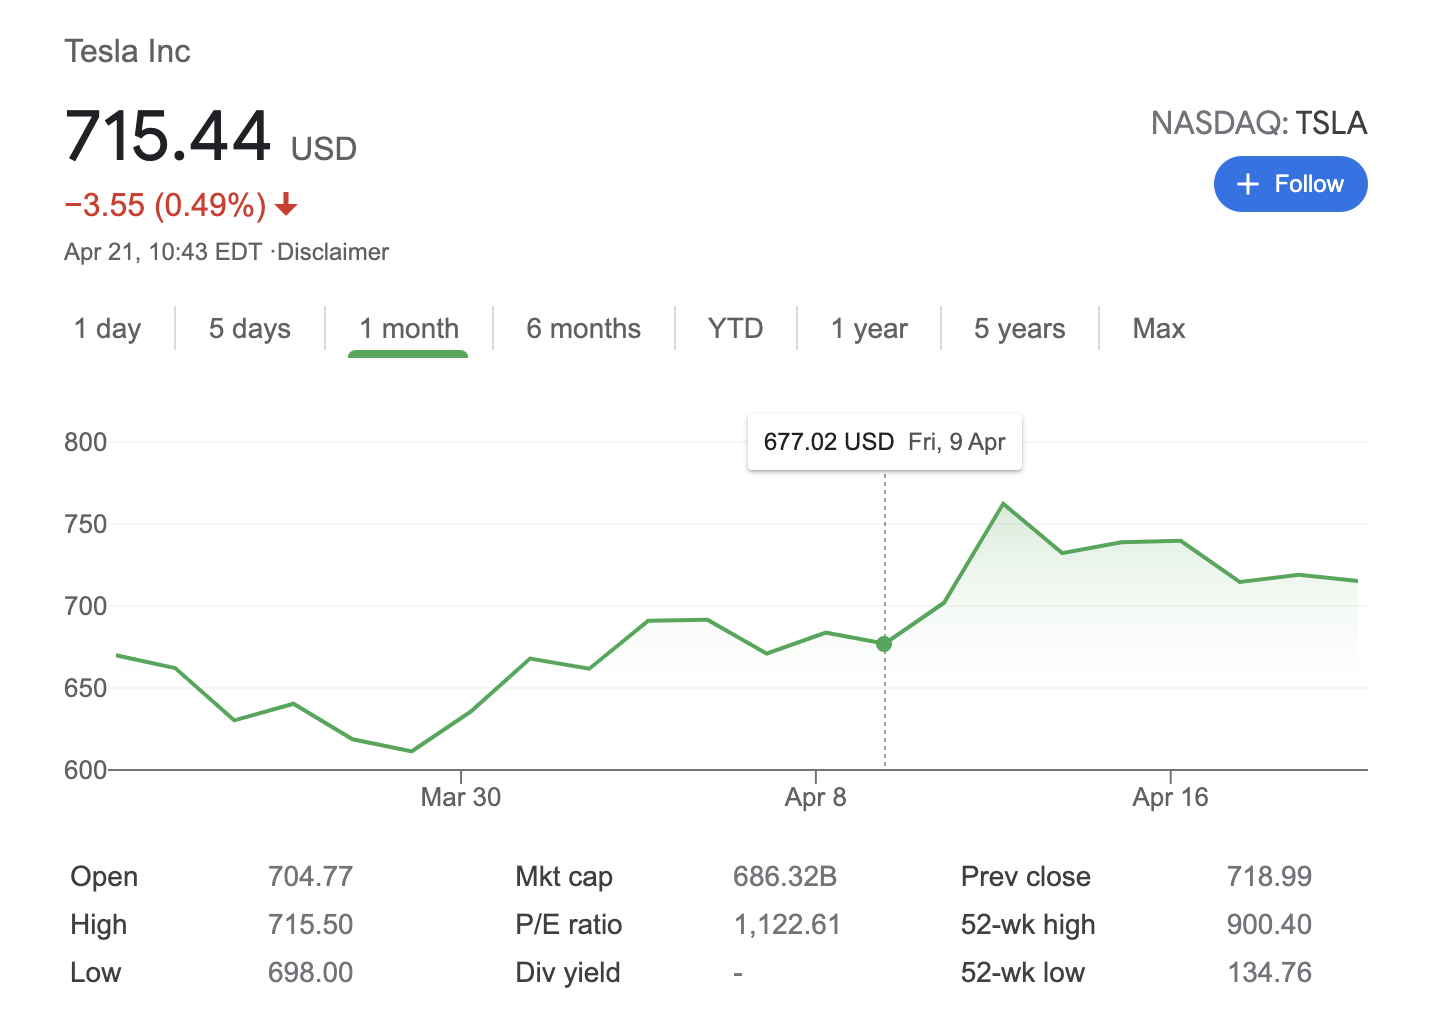

In [ ]:

def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))
  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0],reverse=True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

0.3360449275362319
69
0        Summary List PlacementTesla is easily the strangest company I've ever covered in my entire career as a journalist. When I wrote my first words about Tesla, it was barely building one car and was desperate for a Department of Energy loan, living on investors' …
1                                                                                                            Tesla CEO Elon Musk is once again drawing scrutiny for questionable comments he made to Wall Street analysts, this time involving the status of his company’s...
2     Summary List Placement<ul>\n<li>Concerns over a potential bubble forming in the stock market have been growing as equities continue to hit record highs.</li>\n<li>But according to a Thursday note from JPMorgan, the broader stock market is not in a bubble.</li>\n…
3                                                                                                                                                                       

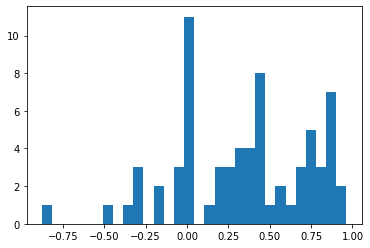

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en
return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = '9-Apr-2021',sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)
print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
47,-0.8762,https://www.fool.com.au/2021/04/09/is-it-riskier-not-owning-tesla-nasdaqtsla/,Is it more risky to NOT own shares of Elon Musk's Tesla Inc (NASDAQ:TSLA) than to own it. This broker thinks it is. Here's why\nThe post Is it riskier NOT owning Tesla (NASDAQ:TSLA)? appeared first on The Motley Fool Australia.,Is it riskier NOT owning Tesla (NASDAQ:TSLA)?
17,-0.4939,https://www.fool.com/investing/2021/04/10/the-abcs-of-bitcoin/,"In this wide-ranging interview, two Fools explain some of the key concepts beginners need to know.",The ABCs of Bitcoin


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
14,0.9633,https://www.investors.com/etfs-and-funds/cabot-founder-picks-best-etfs-sees-artificial-intelligence-gaining/,Cabot Wealth Management founder picks his best ETFs and sees artificial intelligence and alternative energy just getting started.,Cabot Founder Picks His Best ETFs And Sees Artificial Intelligence Fueling Them
5,0.9149,https://www.fool.com/investing/2021/04/09/can-these-3-robinhood-favorites-really-be-winning/,The online brokerage's top stocks don't seem to match up well with the wisdom of crowds.,Can These 3 Robinhood Favorites Really Be Winning Stocks?
